# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew

In [2]:
import warnings
warnings.simplefilter('ignore')

## It is to read the data with Pandas

In [3]:
df = pd.read_csv('/kaggle/input/motor-vehicle-collisions/Motor_Vehicle_Collisions_-_Crashes.csv')
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


## To find the shape of the data that how many rows and columns are there in the Data

In [4]:
df.shape

(2081081, 29)

## To find how many null values are there in the data in each and every columns

In [5]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           647518
ZIP CODE                          647769
LATITUDE                          234016
LONGITUDE                         234016
LOCATION                          234016
ON STREET NAME                    442197
CROSS STREET NAME                 787354
OFF STREET NAME                  1731257
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6837
CONTRIBUTING FACTOR VEHICLE 2     323067
CONTRIBUTING FACTOR VEHICLE 3    1932289
CONTRIBUTING FACTOR VEHICLE 4    2047465
CONTRIBUTING FACTOR VEHICLE 5    2071963
COLLISION_ID                           0
VEHICLE TYPE COD

## It is to check that null values in the percentage level

In [6]:
df.isnull().sum()/len(df)*100

CRASH DATE                        0.000000
CRASH TIME                        0.000000
BOROUGH                          31.114503
ZIP CODE                         31.126564
LATITUDE                         11.244925
LONGITUDE                        11.244925
LOCATION                         11.244925
ON STREET NAME                   21.248428
CROSS STREET NAME                37.833895
OFF STREET NAME                  83.190275
NUMBER OF PERSONS INJURED         0.000865
NUMBER OF PERSONS KILLED          0.001490
NUMBER OF PEDESTRIANS INJURED     0.000000
NUMBER OF PEDESTRIANS KILLED      0.000000
NUMBER OF CYCLIST INJURED         0.000000
NUMBER OF CYCLIST KILLED          0.000000
NUMBER OF MOTORIST INJURED        0.000000
NUMBER OF MOTORIST KILLED         0.000000
CONTRIBUTING FACTOR VEHICLE 1     0.328531
CONTRIBUTING FACTOR VEHICLE 2    15.523999
CONTRIBUTING FACTOR VEHICLE 3    92.850254
CONTRIBUTING FACTOR VEHICLE 4    98.384686
CONTRIBUTING FACTOR VEHICLE 5    99.561862
COLLISION_I

## To split the Date format into 3columns like Date, Month, Year

In [7]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['Year'] = df['CRASH DATE'].dt.year
df['Month'] = df['CRASH DATE'].dt.month
df['Day'] = df['CRASH DATE'].dt.day

In [8]:
df.head(2)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Year,Month,Day
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,2021,9,11
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,2022,3,26


In [9]:
df.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

## It is to see that what are the columns are there in the Dataset

In [10]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'Year', 'Month', 'Day'],
      dtype='object')

In [11]:
df['CRASH TIME'].dtype

dtype('O')

### It is to convert the Time(HH:MM) into complete minutes(MM) wise

In [12]:
df['CRASH TIME'] = df['CRASH TIME'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [13]:
df.head(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Year,Month,Day
0,2021-09-11,159,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,2021,9,11
1,2022-03-26,705,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,2022,3,26
2,2022-06-29,415,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,2022,6,29


### We are dropping the Unwanted Columns

In [14]:
df.drop(['LATITUDE','LONGITUDE','LOCATION'],axis=1,inplace=True)

In [15]:
df.describe()

,CRASH DATE,CRASH TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,Year,Month,Day
count,2081081,2.081081e+06,2.081063e+06,2.081050e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06
mean,2017-07-25 15:13:14.856325888,8.166383e+02,3.104620e-01,1.497321e-03,5.665277e-02,7.419221e-04,2.684614e-02,1.148442e-04,2.232864e-01,6.174676e-04,3.163852e+06,2.017053e+03,6.675280e+00,1.566082e+01
min,2012-07-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,2.012000e+03,1.000000e+00,1.000000e+00
25%,2015-01-19 00:00:00,5.800000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.156390e+06,2.015000e+03,4.000000e+00,8.000000e+00
50%,2017-05-18 00:00:00,8.550000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.676782e+06,2.017000e+03,7.000000e+00,1.600000e+01
75%,2019-08-28 00:00:00,1.080000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.197299e+06,2.019000e+03,1.000000e+01,2.300000e+01
max,2024-04-14 00:00:00,1.439000e+03,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.717899e+06,2.024000e+03,1.200000e+01,3.100000e+01
std,NaN,3.456692e+02,7.004309e-01,4.080669e-02,2.442584e-01,2.770054e-02,1.636427e-01,1.076067e-02,6.615695e-01,2.718710e-02,1.505282e+06,3.092016e+00,3.423156e+00,8.756639e+00


In [16]:
df.describe(include='object')

,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,1433563,1433312.0,1638884,1293727,349824,2074244,1758014,148792,33616,9118,2067293,1682507,143386,32447,8839
unique,5,427.0,18440,20251,226869,61,61,51,41,30,1642,1826,262,102,71
top,BROOKLYN,11207.0,BROADWAY,3 AVENUE,772 EDGEWATER ROAD,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan
freq,456115,20810.0,17277,9843,402,708137,1480124,138707,31708,8595,579207,405051,44632,10859,3071


In [17]:
# Filter numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns

,CRASH TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,Year,Month,Day
0,159,2.0,0.0,0,0,0,0,2,0,4455765,2021,9,11
1,705,1.0,0.0,0,0,0,0,1,0,4513547,2022,3,26
2,415,0.0,0.0,0,0,0,0,0,0,4541903,2022,6,29
3,575,0.0,0.0,0,0,0,0,0,0,4456314,2021,9,11
4,493,0.0,0.0,0,0,0,0,0,0,4486609,2021,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081076,930,0.0,0.0,0,0,0,0,0,0,4717332,2024,4,14
2081077,488,0.0,0.0,0,0,0,0,0,0,4717708,2024,4,11
2081078,961,2.0,0.0,0,0,0,0,2,0,4717729,2024,4,7
2081079,1080,0.0,0.0,0,0,0,0,0,0,4717744,2024,4,7


## It is to see that how much skewness in the particular columns

In [18]:
skewness = numeric_columns.apply(skew)
skewness 

CRASH TIME                       -0.443877
NUMBER OF PERSONS INJURED              NaN
NUMBER OF PERSONS KILLED               NaN
NUMBER OF PEDESTRIANS INJURED     5.673404
NUMBER OF PEDESTRIANS KILLED     41.200349
NUMBER OF CYCLIST INJURED         6.094784
NUMBER OF CYCLIST KILLED         94.452185
NUMBER OF MOTORIST INJURED        5.116768
NUMBER OF MOTORIST KILLED        54.619428
COLLISION_ID                     -1.225409
Year                              0.296721
Month                            -0.078197
Day                               0.018265
dtype: float64

In [19]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           647518
ZIP CODE                          647769
ON STREET NAME                    442197
CROSS STREET NAME                 787354
OFF STREET NAME                  1731257
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6837
CONTRIBUTING FACTOR VEHICLE 2     323067
CONTRIBUTING FACTOR VEHICLE 3    1932289
CONTRIBUTING FACTOR VEHICLE 4    2047465
CONTRIBUTING FACTOR VEHICLE 5    2071963
COLLISION_ID                           0
VEHICLE TYPE CODE 1                13788
VEHICLE TYPE CODE 2               398574
VEHICLE TYPE CODE 3              1937695
VEHICLE TYPE COD

## I am removing the columns that which are unwanted

In [20]:
# Identify columns to drop
columns_to_drop = [
    'OFF STREET NAME',
    'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
    'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5','CRASH DATE'
]

# Drop unwanted columns
df = df.drop(columns=columns_to_drop)
df

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month,Day
0,159,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,0,...,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,2021,9,11
1,705,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,0,0,...,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,2022,3,26
2,415,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,0,0,0,...,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,2022,6,29
3,575,BROOKLYN,11208.0,NaN,NaN,0.0,0.0,0,0,0,...,0,0,Unspecified,NaN,4456314,Sedan,NaN,2021,9,11
4,493,BROOKLYN,11233.0,SARATOGA AVENUE,DECATUR STREET,0.0,0.0,0,0,0,...,0,0,NaN,NaN,4486609,NaN,NaN,2021,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081076,930,MANHATTAN,10036.0,WEST 42 STREET,8 AVENUE,0.0,0.0,0,0,0,...,0,0,Unspecified,Unspecified,4717332,Sedan,Bus,2024,4,14
2081077,488,QUEENS,11103.0,NaN,NaN,0.0,0.0,0,0,0,...,0,0,Passing Too Closely,Unspecified,4717708,Sedan,NaN,2024,4,11
2081078,961,BRONX,10467.0,NaN,NaN,2.0,0.0,0,0,0,...,2,0,Driver Inattention/Distraction,Unspecified,4717729,Sedan,Station Wagon/Sport Utility Vehicle,2024,4,7
2081079,1080,NaN,NaN,BRONX RIVER PARKWAY,NaN,0.0,0.0,0,0,0,...,0,0,Driver Inattention/Distraction,Unspecified,4717744,Station Wagon/Sport Utility Vehicle,Sedan,2024,4,7


## It is to check that how many unique values are there

In [21]:
df['CROSS STREET NAME'].nunique()

20251

In [22]:
df.nunique()

CRASH TIME                          1440
BOROUGH                                5
ZIP CODE                             427
ON STREET NAME                     18440
CROSS STREET NAME                  20251
NUMBER OF PERSONS INJURED             32
NUMBER OF PERSONS KILLED               7
NUMBER OF PEDESTRIANS INJURED         14
NUMBER OF PEDESTRIANS KILLED           4
NUMBER OF CYCLIST INJURED              5
NUMBER OF CYCLIST KILLED               3
NUMBER OF MOTORIST INJURED            31
NUMBER OF MOTORIST KILLED              6
CONTRIBUTING FACTOR VEHICLE 1         61
CONTRIBUTING FACTOR VEHICLE 2         61
COLLISION_ID                     2081081
VEHICLE TYPE CODE 1                 1642
VEHICLE TYPE CODE 2                 1826
Year                                  13
Month                                 12
Day                                   31
dtype: int64

### how many numeric columns are there and in that what are the columns are there in the Numerical columns

In [23]:
#Finding Numerical Columns
num_cols=[]
for col in df.columns:
    if(df[col].dtypes!='object'):
        num_cols.append(col)
print(f"There are total {len(num_cols)} numerical columns in dataset")
print(num_cols)

There are total 13 numerical columns in dataset
['CRASH TIME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID', 'Year', 'Month', 'Day']


### how many Categorical columns are there and what are those columns

In [24]:
#Finding Numerical Columns
cat_col=[]
for col in df.columns:
    if(df[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} numerical columns in dataset")
print(cat_col)

There are total 8 numerical columns in dataset
['BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']


# Visualizations

In [25]:
y=df.groupby(['BOROUGH'])[['NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']].sum()
y

,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST KILLED
BOROUGH,,,,
BRONX,278.0,135,25,109
BROOKLYN,627.0,336,69,207
MANHATTAN,332.0,237,38,53
QUEENS,529.0,277,34,213
STATEN ISLAND,95.0,39,4,51


<Axes: xlabel='BOROUGH'>

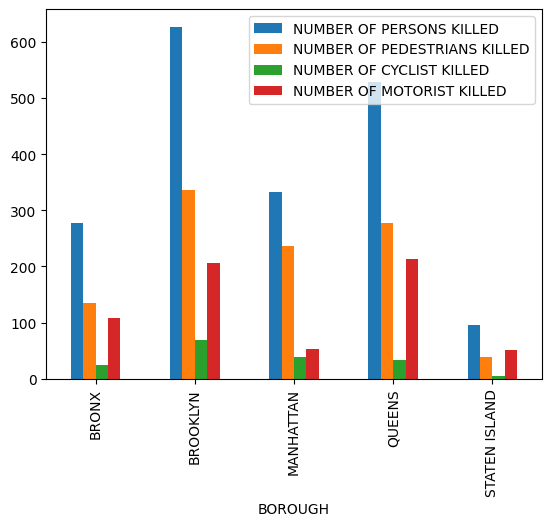

In [26]:
y.plot.bar()

### From the above graph we can conclude that 
1. In the BROOKLYN more no. of persons have killed
2. In the BROOKLYN the Pedestrains have killed are also in the large number as compared to other streets
3. In the BROOKLYN the more Cyclist people are Killed
4. In the BROOKLYN only the more Motorist are killed as compared to other areas

In [27]:
x=df.groupby(['BOROUGH'])[['NUMBER OF PEDESTRIANS INJURED','NUMBER OF PERSONS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED']].sum()
x

,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PERSONS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED
BOROUGH,,,,
BRONX,15633,69521.0,4524,48409
BROOKLYN,31990,151123.0,16968,99854
MANHATTAN,21401,67665.0,12823,32573
QUEENS,22411,115843.0,8420,83528
STATEN ISLAND,2583,17223.0,513,14065


<Axes: xlabel='BOROUGH'>

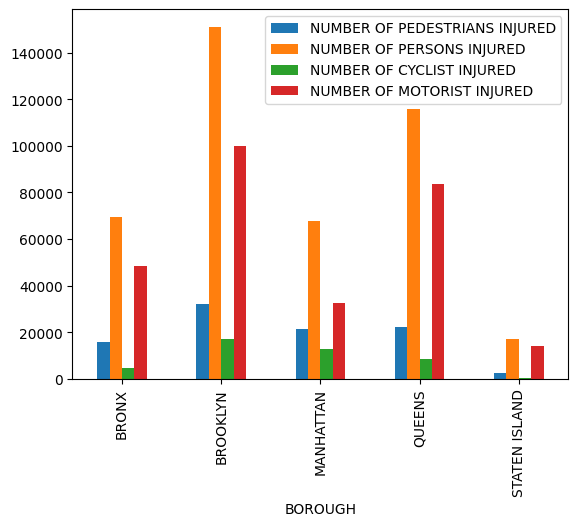

In [28]:
x.plot.bar()

### CONCLUSION: 
* From the above bar graph we can conclude that BROOKYN district has the high chances of crashing.

In [29]:
grouped_data = df.groupby(['BOROUGH', 'ON STREET NAME'])['NUMBER OF PERSONS KILLED'].sum().reset_index()
grouped_data

,BOROUGH,ON STREET NAME,NUMBER OF PERSONS KILLED
0,BRONX,,0.0
1,BRONX,149TH STREET,0.0
2,BRONX,163 street,0.0
3,BRONX,165 street,0.0
4,BRONX,169 street,0.0
...,...,...,...
15814,STATEN ISLAND,st george road,0.0
15815,STATEN ISLAND,st marys avenue,0.0
15816,STATEN ISLAND,st pauls ave,0.0
15817,STATEN ISLAND,veterans road west,0.0


In [30]:
pivot_table = grouped_data.pivot(index='BOROUGH', columns='ON STREET NAME', values='NUMBER OF PERSONS KILLED')
pivot_table

ON STREET NAME,,1st avenue,Wallabout Street,williams avenue,1 AVE,1 AVENUE,1 AVENUE,1 Avenue,1 COURT,1 PLACE,...,west street,westchester ave,westchester avenue,williamsburg bridge,willis ave bridge,wilson avenue,woodhaven blvd,woodhaven boulevard,woodside ave,wyckoff ave
BOROUGH,,,,,,,,,,,,,,,,,,,,,
BRONX,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
BROOKLYN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
MANHATTAN,0.0,0.0,NaN,NaN,0.0,4.0,7.0,0.0,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
QUEENS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
STATEN ISLAND,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### It is to remove the unwanted column

In [31]:
# Assuming df is your DataFrame and '73 STREET' is the name of the column
column_to_clean = 'CROSS STREET NAME'

# Drop rows with NaN values in the specified column
df_cleaned = df.dropna(subset=[column_to_clean])
df_cleaned

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month,Day
0,159,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,0,...,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,2021,9,11
4,493,BROOKLYN,11233.0,SARATOGA AVENUE,DECATUR STREET,0.0,0.0,0,0,0,...,0,0,NaN,NaN,4486609,NaN,NaN,2021,12,14
9,898,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,0,...,0,0,Passing Too Closely,Unspecified,4486519,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14
11,1010,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,0,0,...,0,0,Turning Improperly,Unspecified,4487127,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14
12,510,NaN,NaN,broadway,west 80 street -west 81 street,0.0,0.0,0,0,0,...,0,0,Unsafe Lane Changing,Unspecified,4486634,Station Wagon/Sport Utility Vehicle,Sedan,2021,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081070,718,MANHATTAN,10001.0,WEST 34 STREET,DYER AVENUE,0.0,0.0,0,0,0,...,0,0,Oversized Vehicle,Passing Too Closely,4717643,Bus,Sedan,2024,4,12
2081071,870,BROOKLYN,11231.0,PIONEER STREET,VAN BRUNT STREET,0.0,0.0,0,0,0,...,0,0,Passing Too Closely,Unspecified,4717841,Sedan,NaN,2024,4,8
2081073,212,MANHATTAN,10038.0,FULTON STREET,CLIFF STREET,1.0,0.0,1,0,0,...,0,0,Failure to Yield Right-of-Way,NaN,4717465,Sedan,NaN,2024,4,14
2081076,930,MANHATTAN,10036.0,WEST 42 STREET,8 AVENUE,0.0,0.0,0,0,0,...,0,0,Unspecified,Unspecified,4717332,Sedan,Bus,2024,4,14


### It is to see that how many null values are there after removing the unwanted column

In [32]:
# Now df_cleaned contains rows without NaN values in the specified column
df_cleaned.isnull().sum()

CRASH TIME                            0
BOROUGH                          175986
ZIP CODE                         176144
ON STREET NAME                      346
CROSS STREET NAME                     0
NUMBER OF PERSONS INJURED             5
NUMBER OF PERSONS KILLED             11
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      4418
CONTRIBUTING FACTOR VEHICLE 2    185027
COLLISION_ID                          0
VEHICLE TYPE CODE 1                8175
VEHICLE TYPE CODE 2              209580
Year                                  0
Month                                 0
Day                                   0
dtype: int64

In [33]:
column_to_clean = 'CONTRIBUTING FACTOR VEHICLE 2'

# Drop rows with NaN values in the specified column
df_cleaned1 = df_cleaned.dropna(subset=[column_to_clean])
df_cleaned1

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month,Day
0,159,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,0,...,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,2021,9,11
9,898,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,0,...,0,0,Passing Too Closely,Unspecified,4486519,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14
11,1010,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,0,0,...,0,0,Turning Improperly,Unspecified,4487127,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14
12,510,NaN,NaN,broadway,west 80 street -west 81 street,0.0,0.0,0,0,0,...,0,0,Unsafe Lane Changing,Unspecified,4486634,Station Wagon/Sport Utility Vehicle,Sedan,2021,12,14
14,1390,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,0,0,0,...,2,0,Reaction to Uninvolved Vehicle,Unspecified,4486635,Sedan,Sedan,2021,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081065,706,BROOKLYN,11228.0,11 AVENUE,79 STREET,0.0,0.0,0,0,0,...,0,0,Driver Inattention/Distraction,Unspecified,4717029,Sedan,NaN,2024,4,14
2081070,718,MANHATTAN,10001.0,WEST 34 STREET,DYER AVENUE,0.0,0.0,0,0,0,...,0,0,Oversized Vehicle,Passing Too Closely,4717643,Bus,Sedan,2024,4,12
2081071,870,BROOKLYN,11231.0,PIONEER STREET,VAN BRUNT STREET,0.0,0.0,0,0,0,...,0,0,Passing Too Closely,Unspecified,4717841,Sedan,NaN,2024,4,8
2081076,930,MANHATTAN,10036.0,WEST 42 STREET,8 AVENUE,0.0,0.0,0,0,0,...,0,0,Unspecified,Unspecified,4717332,Sedan,Bus,2024,4,14


In [34]:
# Now df_cleaned contains rows without NaN values in the specified column
df_cleaned1.isnull().sum()

CRASH TIME                            0
BOROUGH                          153003
ZIP CODE                         153145
ON STREET NAME                      289
CROSS STREET NAME                     0
NUMBER OF PERSONS INJURED             1
NUMBER OF PERSONS KILLED              1
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
CONTRIBUTING FACTOR VEHICLE 2         0
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1635
VEHICLE TYPE CODE 2               45361
Year                                  0
Month                                 0
Day                                   0
dtype: int64

In [35]:
# Assuming df is your DataFrame and '73 STREET' is the name of the column
column_to_clean = 'ZIP CODE'

# Drop rows with NaN values in the specified column
df_cleaned2 = df_cleaned1.dropna(subset=[column_to_clean])
df_cleaned2.isnull().sum()

CRASH TIME                           0
BOROUGH                              0
ZIP CODE                             0
ON STREET NAME                       0
CROSS STREET NAME                    0
NUMBER OF PERSONS INJURED            1
NUMBER OF PERSONS KILLED             1
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1        0
CONTRIBUTING FACTOR VEHICLE 2        0
COLLISION_ID                         0
VEHICLE TYPE CODE 1               1404
VEHICLE TYPE CODE 2              38974
Year                                 0
Month                                0
Day                                  0
dtype: int64

In [36]:
column_to_clean = 'VEHICLE TYPE CODE 2'

# Drop rows with NaN values in the specified column
df_cleaned3 = df_cleaned2.dropna(subset=[column_to_clean])
df_cleaned3.isnull().sum()

CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
ON STREET NAME                   0
CROSS STREET NAME                0
NUMBER OF PERSONS INJURED        1
NUMBER OF PERSONS KILLED         1
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              2
VEHICLE TYPE CODE 2              0
Year                             0
Month                            0
Day                              0
dtype: int64

In [37]:
df_cleaned3.fillna('0',inplace=True)

In [38]:
# Define a mapping dictionary to group contributing factors into broader categories
factor_mapping = {
    'Failure to Yield Right-of-Way': 'Traffic Violation',
    'Traffic Control Disregarded': 'Traffic Violation',
    'Unsafe Lane Changing': 'Traffic Violation',
    'Unsafe Speed': 'Traffic Violation',
    'Driver Inattention/Distraction': 'Driver Distraction',
    'Following Too Closely': 'Driver Distraction',
    'Passing or Lane Usage Improper': 'Driver Error',
    'Turning Improperly': 'Driver Error',
    'Passing Too Closely': 'Driver Error',
    'Driver Inexperience': 'Driver Error',
    'Reaction to Uninvolved Vehicle': 'Driver Error',
    'Pavement Slippery': 'Road Condition',
    'Obstruction/Debris': 'Road Condition',
    'Glare': 'Road Condition',
    'View Obstructed/Limited': 'Road Condition',
    'Other Vehicular': 'Other',
    'Unspecified': 'Other',
    'Alcohol Involvement': 'Impairment',
    'Drugs (illegal)': 'Impairment',
    'Drugs (Illegal)': 'Impairment',  # Handling case variations
    'Fatigued/Drowsy': 'Physical Condition',
    'Illnes': 'Physical Condition',  # Correcting misspelling
    'Lost Consciousness': 'Physical Condition',
    'Fell Asleep': 'Physical Condition',
    'Illness': 'Physical Condition',  # Handling case variations
    'Other Lighting Defects': 'Vehicle Defect',
    'Brakes Defective': 'Vehicle Defect',
    'Tire Failure/Inadequate': 'Vehicle Defect',
    'Accelerator Defective': 'Vehicle Defect',
    'Steering Failure': 'Vehicle Defect',
    'Headlights Defective': 'Vehicle Defect',
    'Shoulders Defective/Improper': 'Vehicle Defect',
    'Windshield Inadequate': 'Vehicle Defect',
    'Other Electronic Device': 'Distraction',
    'Eating or Drinking': 'Distraction',
    'Cell Phone (hands-free)': 'Distraction',
    'Cell Phone (hand-Held)': 'Distraction',
    'Texting': 'Distraction',
    'Listening/Using Headphones': 'Distraction',
    'Using On Board Navigation Device': 'Distraction',
    'Outside Car Distraction': 'Distraction',
    'Passenger Distraction': 'Distraction',
    'Reaction to Other Uninvolved Vehicle': 'Other',
    'Animals Action': 'Other',
    'Vehicle Vandalism': 'Other',
    'Driverless/Runaway Vehicle': 'Other',
    'Tow Hitch Defective': 'Other',
    'Prescription Medication': 'Other',
    '80': 'Other',  # Unclear category, assigned to 'Other'
    '1': 'Other',   # Unclear category, assigned to 'Other'
    'Pavement Defective': 'Other',  # Unclear category, assigned to 'Other'
    'Lane Marking Improper/Inadequate': 'Other',
    'Traffic Control Device Improper/Non-Working': 'Other',
    'Windshield Inadequate': 'Vehicle Defect',  # Handling duplication
    'Tire Failure/Inadequate': 'Vehicle Defect',  # Handling duplication
    '80': 'Other',  # Handling duplication
    'Drugs (Illegal)': 'Impairment'  # Handling duplication
}

# Apply the mapping to create a new column with merged contributing factors
df_cleaned3['Merged_Contributing_Factor'] = df_cleaned3['CONTRIBUTING FACTOR VEHICLE 1'].map(factor_mapping)

# Display unique merged categories
merged_categories = df_cleaned3['Merged_Contributing_Factor'].unique()
print("Unique Merged Contributing Factors:\n",merged_categories)

Unique Merged Contributing Factors:
 ['Driver Error' 'Other' 'Impairment' 'Road Condition' 'Traffic Violation'
 'Driver Distraction' 'Physical Condition' 'Vehicle Defect' nan
 'Distraction']


In [39]:
df_cleaned3.isnull().sum()

CRASH TIME                           0
BOROUGH                              0
ZIP CODE                             0
ON STREET NAME                       0
CROSS STREET NAME                    0
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1        0
CONTRIBUTING FACTOR VEHICLE 2        0
COLLISION_ID                         0
VEHICLE TYPE CODE 1                  0
VEHICLE TYPE CODE 2                  0
Year                                 0
Month                                0
Day                                  0
Merged_Contributing_Factor       51667
dtype: int64

In [40]:
df_cleaned3 = df_cleaned3.dropna(subset=['Merged_Contributing_Factor'])
df_cleaned3

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month,Day,Merged_Contributing_Factor
9,898,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,0,...,0,Passing Too Closely,Unspecified,4486519,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error
11,1010,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,0,0,...,0,Turning Improperly,Unspecified,4487127,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error
14,1390,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,0,0,0,...,0,Reaction to Uninvolved Vehicle,Unspecified,4486635,Sedan,Sedan,2021,12,14,Driver Error
18,1183,BRONX,10463.0,WEST KINGSBRIDGE ROAD,HEATH AVENUE,1.0,0.0,0,0,0,...,0,Unspecified,Unspecified,4487040,Station Wagon/Sport Utility Vehicle,Sedan,2021,12,11,Other
24,1060,STATEN ISLAND,10301.0,VICTORY BOULEVARD,WOODSTOCK AVENUE,1.0,0.0,0,0,0,...,0,Unspecified,Unspecified,4487001,Sedan,Sedan,2021,12,13,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081056,855,BROOKLYN,11225.0,ROGERS AVENUE,MIDWOOD STREET,0.0,0.0,0,0,0,...,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4717558,Sedan,Motorcycle,2024,4,14,Driver Distraction
2081059,819,BROOKLYN,11208.0,JAMAICA AVENUE,CYPRESS HILL STREET,1.0,0.0,0,0,0,...,0,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,4717316,Station Wagon/Sport Utility Vehicle,E-Scooter,2024,4,14,Traffic Violation
2081060,740,STATEN ISLAND,10314.0,SLOSSON AVENUE,POTTER AVENUE,0.0,0.0,0,0,0,...,0,Unspecified,Unspecified,4717674,Station Wagon/Sport Utility Vehicle,Sedan,2024,4,13,Other
2081076,930,MANHATTAN,10036.0,WEST 42 STREET,8 AVENUE,0.0,0.0,0,0,0,...,0,Unspecified,Unspecified,4717332,Sedan,Bus,2024,4,14,Other


In [41]:
#Finding Numerical Columns
numeric_cols=[]
for col in df_cleaned3.columns:
    if(df_cleaned3[col].dtypes!='object'):
        numeric_cols.append(col)
print(f"There are total {len(numeric_cols)} numerical columns in dataset")
print(numeric_cols)

There are total 11 numerical columns in dataset
['CRASH TIME', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID', 'Year', 'Month', 'Day']


In [42]:
cat_col=[]
for col in df_cleaned3.columns:
    if(df_cleaned3[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} numerical columns in dataset")
print(cat_col)

There are total 11 numerical columns in dataset
['BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'Merged_Contributing_Factor']


In [43]:
date = df_cleaned3.iloc[:,-4:-1].reset_index()
date

,index,Year,Month,Day
0,9,2021,12,14
1,11,2021,12,14
2,14,2021,12,14
3,18,2021,12,11
4,24,2021,12,13
...,...,...,...,...
864909,2081056,2024,4,14
864910,2081059,2024,4,14
864911,2081060,2024,4,13
864912,2081076,2024,4,14


In [44]:
date.dtypes

index    int64
Year     int32
Month    int32
Day      int32
dtype: object

In [45]:
numeric_cols = df_cleaned3.select_dtypes(include=['number']).reset_index()
numeric_cols = numeric_cols.iloc[:,:-3]
numeric_cols

,index,CRASH TIME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
0,9,898,0,0,0,0,0,0,4486519
1,11,1010,0,0,0,0,0,0,4487127
2,14,1390,0,0,0,0,2,0,4486635
3,18,1183,0,0,0,0,1,0,4487040
4,24,1060,0,0,0,0,1,0,4487001
...,...,...,...,...,...,...,...,...,...
864909,2081056,855,0,0,0,0,0,0,4717558
864910,2081059,819,0,0,0,0,0,0,4717316
864911,2081060,740,0,0,0,0,0,0,4717674
864912,2081076,930,0,0,0,0,0,0,4717332


In [46]:
numeric_cols.drop(['index'],axis =1, inplace = True)

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_cols)
scaled_data

array([[0.62404448, 0.        , 0.        , ..., 0.        , 0.        ,
        0.95095776],
       [0.7018763 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.95108663],
       [0.96594858, 0.        , 0.        , ..., 0.04651163, 0.        ,
        0.95098235],
       ...,
       [0.514246  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99995337],
       [0.64628214, 0.        , 0.        , ..., 0.        , 0.        ,
        0.99988088],
       [0.27032662, 0.        , 0.        , ..., 0.        , 0.        ,
        0.99989529]])

In [48]:
num = pd.DataFrame(scaled_data,columns = numeric_cols.columns)
num

,CRASH TIME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
0,0.624044,0.0,0.0,0.0,0.0,0.000000,0.0,0.950958
1,0.701876,0.0,0.0,0.0,0.0,0.000000,0.0,0.951087
2,0.965949,0.0,0.0,0.0,0.0,0.046512,0.0,0.950982
3,0.822099,0.0,0.0,0.0,0.0,0.023256,0.0,0.951068
4,0.736623,0.0,0.0,0.0,0.0,0.023256,0.0,0.951060
...,...,...,...,...,...,...,...,...
864909,0.594163,0.0,0.0,0.0,0.0,0.000000,0.0,0.999929
864910,0.569145,0.0,0.0,0.0,0.0,0.000000,0.0,0.999877
864911,0.514246,0.0,0.0,0.0,0.0,0.000000,0.0,0.999953
864912,0.646282,0.0,0.0,0.0,0.0,0.000000,0.0,0.999881


In [49]:
cat_col=[]
for col in df_cleaned3.columns:
    if(df_cleaned3[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} numerical columns in dataset")
print(cat_col)

There are total 11 numerical columns in dataset
['BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'Merged_Contributing_Factor']


In [50]:
cat = df_cleaned3.select_dtypes(include='O')
cat.head(2)

,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Merged_Contributing_Factor
9,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Driver Error
11,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Driver Error


In [51]:
df['NUMBER OF PERSONS INJURED'].value_counts()

NUMBER OF PERSONS INJURED
0.0     1604525
1.0      369863
2.0       69675
3.0       22759
4.0        8431
5.0        3242
6.0        1353
7.0         575
8.0         253
9.0         129
10.0         85
11.0         50
12.0         32
13.0         27
15.0         14
14.0          9
16.0          8
18.0          6
17.0          6
19.0          4
22.0          3
24.0          3
20.0          2
40.0          1
31.0          1
27.0          1
32.0          1
43.0          1
21.0          1
23.0          1
34.0          1
25.0          1
Name: count, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df['NUMBER OF PERSONS INJURED'])

array([2, 1, 0, ..., 2, 0, 0])

In [53]:
cat['NUMBER OF PERSONS INJURED']

9          0.0
11         0.0
14         2.0
18         1.0
24         1.0
          ... 
2081056    0.0
2081059    1.0
2081060    0.0
2081076    0.0
2081080    0.0
Name: NUMBER OF PERSONS INJURED, Length: 864914, dtype: object

In [54]:
date.drop(['index'],axis = 1, inplace = True)

In [55]:
date.dtypes

Year     int32
Month    int32
Day      int32
dtype: object

In [56]:
cat = pd.concat([cat,df_cleaned3['Year']],axis = 1)
cat

,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Merged_Contributing_Factor,Year
9,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Driver Error,2021
11,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Driver Error,2021
14,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,Reaction to Uninvolved Vehicle,Unspecified,Sedan,Sedan,Driver Error,2021
18,BRONX,10463.0,WEST KINGSBRIDGE ROAD,HEATH AVENUE,1.0,0.0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,Other,2021
24,STATEN ISLAND,10301.0,VICTORY BOULEVARD,WOODSTOCK AVENUE,1.0,0.0,Unspecified,Unspecified,Sedan,Sedan,Other,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2081056,BROOKLYN,11225.0,ROGERS AVENUE,MIDWOOD STREET,0.0,0.0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Motorcycle,Driver Distraction,2024
2081059,BROOKLYN,11208.0,JAMAICA AVENUE,CYPRESS HILL STREET,1.0,0.0,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle,E-Scooter,Traffic Violation,2024
2081060,STATEN ISLAND,10314.0,SLOSSON AVENUE,POTTER AVENUE,0.0,0.0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,Other,2024
2081076,MANHATTAN,10036.0,WEST 42 STREET,8 AVENUE,0.0,0.0,Unspecified,Unspecified,Sedan,Bus,Other,2024


In [57]:
cat.isnull().sum()

BOROUGH                          0
ZIP CODE                         0
ON STREET NAME                   0
CROSS STREET NAME                0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
Merged_Contributing_Factor       0
Year                             0
dtype: int64

In [58]:
cat.dtypes

BOROUGH                          object
ZIP CODE                         object
ON STREET NAME                   object
CROSS STREET NAME                object
NUMBER OF PERSONS INJURED        object
NUMBER OF PERSONS KILLED         object
CONTRIBUTING FACTOR VEHICLE 1    object
CONTRIBUTING FACTOR VEHICLE 2    object
VEHICLE TYPE CODE 1              object
VEHICLE TYPE CODE 2              object
Merged_Contributing_Factor       object
Year                              int32
dtype: object

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat= cat.astype(str)
Categorcial_Final=cat.apply(le.fit_transform)
cat_final=Categorcial_Final.reset_index()
cat_final

,index,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Merged_Contributing_Factor,Year
0,9,2,32,986,5680,1,1,31,54,443,638,2,9
1,11,3,336,9780,5865,1,1,45,54,443,638,2,9
2,14,3,372,8127,483,13,1,37,54,443,623,2,9
3,18,0,155,11481,7378,2,1,48,54,455,623,4,9
4,24,4,107,10612,14146,2,1,48,54,443,623,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864909,2081056,1,250,9131,9299,1,1,8,10,443,452,1,12
864910,2081059,1,216,6623,4711,2,1,14,17,455,201,7,12
864911,2081060,4,129,9657,10580,1,1,48,54,455,623,4,12
864912,2081076,2,70,11310,1721,1,1,48,54,443,84,4,12


In [60]:
cat_final.drop(['index'],axis =1, inplace = True)

In [61]:
num.shape

(864914, 8)

In [62]:
# Categorcial_Final.reset_index(drop=True, inplace=True)
# num.reset_index(drop=True, inplace=True)
# final = pd.concat([Categorcial_Final, num], axis=1)
# final
date

,Year,Month,Day
0,2021,12,14
1,2021,12,14
2,2021,12,14
3,2021,12,11
4,2021,12,13
...,...,...,...
864909,2024,4,14
864910,2024,4,14
864911,2024,4,13
864912,2024,4,14


In [63]:
final_df = pd.concat([cat_final,num,date.iloc[:,3:]],axis=1)
final_df

,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Merged_Contributing_Factor,Year,CRASH TIME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
0,2,32,986,5680,1,1,31,54,443,638,2,9,0.624044,0.0,0.0,0.0,0.0,0.000000,0.0,0.950958
1,3,336,9780,5865,1,1,45,54,443,638,2,9,0.701876,0.0,0.0,0.0,0.0,0.000000,0.0,0.951087
2,3,372,8127,483,13,1,37,54,443,623,2,9,0.965949,0.0,0.0,0.0,0.0,0.046512,0.0,0.950982
3,0,155,11481,7378,2,1,48,54,455,623,4,9,0.822099,0.0,0.0,0.0,0.0,0.023256,0.0,0.951068
4,4,107,10612,14146,2,1,48,54,443,623,4,9,0.736623,0.0,0.0,0.0,0.0,0.023256,0.0,0.951060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864909,1,250,9131,9299,1,1,8,10,443,452,1,12,0.594163,0.0,0.0,0.0,0.0,0.000000,0.0,0.999929
864910,1,216,6623,4711,2,1,14,17,455,201,7,12,0.569145,0.0,0.0,0.0,0.0,0.000000,0.0,0.999877
864911,4,129,9657,10580,1,1,48,54,455,623,4,12,0.514246,0.0,0.0,0.0,0.0,0.000000,0.0,0.999953
864912,2,70,11310,1721,1,1,48,54,443,84,4,12,0.646282,0.0,0.0,0.0,0.0,0.000000,0.0,0.999881


In [64]:
final_df.isnull().sum()

BOROUGH                          0
ZIP CODE                         0
ON STREET NAME                   0
CROSS STREET NAME                0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
Merged_Contributing_Factor       0
Year                             0
CRASH TIME                       0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
COLLISION_ID                     0
dtype: int64

In [65]:
final_df['CONTRIBUTING FACTOR VEHICLE 1'].nunique()

53

In [66]:
x= final_df.drop(['CONTRIBUTING FACTOR VEHICLE 1','Merged_Contributing_Factor','COLLISION_ID','CONTRIBUTING FACTOR VEHICLE 2'],axis=1)
y= final_df['Merged_Contributing_Factor']

In [67]:
print(x.shape)
print(y.shape)

(864914, 16)
(864914,)


In [68]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=56)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(648685, 16)
(216229, 16)
(648685,)
(216229,)


## Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [72]:
y_pred_train = log_reg.predict(x_train)
y_pred_train

array([4, 4, 4, ..., 4, 4, 4])

In [73]:
y_pred_test = log_reg.predict(x_test)
y_pred_test

array([4, 4, 4, ..., 1, 4, 4])

In [74]:
log_reg.coef_

array([[-6.57182111e-06, -7.68628067e-04,  2.03235493e-06,
        -2.63521039e-06, -6.46650204e-06, -2.80739924e-06,
        -9.73340086e-04, -1.42683501e-03, -1.83275164e-05,
        -1.56447718e-06,  1.77345890e-09,  1.96293730e-10,
         5.61247114e-08,  1.13824950e-09, -2.48819420e-08,
        -1.34365899e-09],
       [ 1.72292872e-05,  6.73483268e-04,  3.23880742e-05,
         2.01340349e-05,  1.06673860e-05,  2.02597716e-06,
         1.73946009e-03,  1.02373926e-03,  1.56306545e-04,
         1.50438622e-06, -4.70515175e-09, -1.12275248e-09,
         2.44448850e-07,  3.85259516e-10,  6.96856826e-08,
        -1.06779395e-08],
       [ 3.26679811e-07, -3.30019068e-04,  2.64093825e-05,
         2.29456278e-05, -1.43768131e-05, -6.50916871e-07,
         4.47560719e-04,  7.03132690e-04,  7.50115698e-05,
        -3.35388392e-07, -3.60214824e-09, -9.24289357e-10,
        -2.96353194e-07, -4.42320556e-09, -7.40746697e-08,
        -1.55417856e-09],
       [-6.20991527e-06, -5.41704315e

In [75]:
log_reg.intercept_

array([-2.80656433e-06,  2.06509304e-06, -6.31047107e-07, -2.69343015e-06,
        1.10351557e-05, -1.81170950e-06, -2.66424520e-06,  1.17572392e-08,
       -2.50500966e-06])

In [76]:
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score, confusion_matrix, classification_report

In [77]:
acc_score = accuracy_score(y_train, y_pred_train)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_pred_train, average='micro')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_pred_train, average='micro')
print('recall score :' ,re_call)
con_mat = confusion_matrix(y_train, y_pred_train)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_train, y_pred_train)
print('classification report :\n', cls_rep)

Accuracy score : 0.4501815210772563
Precision score : 0.4501815210772563
recall score : 0.4501815210772563
confusion matrix :
 [[     0    347      0      0   8313      0      0      0      0]
 [     0   3891      0      0 148529      0      0      0      0]
 [     0   1709      0      0  59592      0      0      0      0]
 [     0     78      0      0   7436      0      0      0      0]
 [     0   4209      0      0 288135      0      0      0      0]
 [     0    355      0      0  32083      0      0      0      0]
 [     0    192      0      0  11729      0      0      0      0]
 [     0   1982      0      0  76424      0      0      0      0]
 [     0     61      0      0   3620      0      0      0      0]]
classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8660
           1       0.30      0.03      0.05    152420
           2       0.00      0.00      0.00     61301
           3       0.00      0.00   

In [78]:
accuracy = accuracy_score(y_test,y_pred_test)
precision = precision_score(y_test,y_pred_test,average='micro')
recall = recall_score(y_test,y_pred_test,average='micro')
conf_matrix = confusion_matrix(y_test,y_pred_test)
classification_report_str = classification_report(y_test, y_pred_test)

In [79]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.44888520966197876
Precision: 0.44888520966197876
Recall: 0.44888520966197876
Confusion Matrix:
 [[    0   116     0     0  2601     0     0     0     0]
 [    0  1314     0     0 49911     0     0     0     0]
 [    0   586     0     0 19866     0     0     0     0]
 [    0    20     0     0  2442     0     0     0     0]
 [    0  1428     0     0 95748     0     0     0     0]
 [    0   136     0     0 10816     0     0     0     0]
 [    0    76     0     0  3831     0     0     0     0]
 [    0   698     0     0 25361     0     0     0     0]
 [    0    17     0     0  1262     0     0     0     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2717
           1       0.30      0.03      0.05     51225
           2       0.00      0.00      0.00     20452
           3       0.00      0.00      0.00      2462
           4       0.45      0.99      0.62     97176
           5       0.00      

In [80]:
# param_grid = {
#     'C': [0.1, 1.0, 10.0],  # Regularization parameter
#     'solver': ['liblinear', 'lbfgs'],  # Optimization algorithm
#     'penalty': ['l1', 'l2'],  # Regularization type
#     'max_iter': [100, 200, 300],  # Maximum number of iterations
#     'class_weight': [None, 'balanced'],  # Class weight setting
#     'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
# }
# grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search

# Decision Tree

In [82]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt = DecisionTreeClassifier(max_depth=10,criterion='gini',random_state=23,splitter='best')

In [84]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'best'}

In [85]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=23)

In [86]:
y_pred_train = dt.predict(x_train)
y_pred_train

array([1, 1, 4, ..., 4, 4, 1])

In [87]:
y_pred_test = dt.predict(x_test)
y_pred_test

array([1, 1, 4, ..., 1, 4, 4])

In [88]:
acc_score = accuracy_score(y_train, y_pred_train)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_pred_train, average='micro')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_pred_train, average='micro')
print('recall score :' ,re_call)
con_mat = confusion_matrix(y_train, y_pred_train)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_train, y_pred_train)
print('classification report :\n', cls_rep)

Accuracy score : 0.5293493760453841
Precision score : 0.5293493760453841
recall score : 0.5293493760453841
confusion matrix :
 [[    20   1921     35      0   6509     34      0    141      0]
 [     2  88455    834      2  58565    150      3   4409      0]
 [     2  35880   1434      0  20228    160      1   3596      0]
 [     0   3305     22     20   3815      9      1    342      0]
 [     7  44897    266      4 244881    196      3   2090      0]
 [     2   2821     20      0  28725    443      0    427      0]
 [     0   4757     55      0   6621     23      9    456      0]
 [     5  40482    660      0  29013    125      4   8117      0]
 [     0   1564     19      0   1924      9      1    162      2]]
classification report :
               precision    recall  f1-score   support

           0       0.53      0.00      0.00      8660
           1       0.39      0.58      0.47    152420
           2       0.43      0.02      0.04     61301
           3       0.77      0.00   

In [89]:
acc_score = accuracy_score(y_test, y_pred_test)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_pred_test, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_pred_test, average='weighted')
print('recall score :' ,re_call)
con_mat = confusion_matrix(y_test, y_pred_test)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_test, y_pred_test)
print('classification report :\t\n', cls_rep)

Accuracy score : 0.5241017624832932
Precision score : 0.4617776199198332
recall score : 0.5241017624832932
confusion matrix :
 [[    0   608    11     0  2036    10     0    52     0]
 [    1 29242   288     0 20019    67     1  1607     0]
 [    0 12038   453     1  6703    43     0  1214     0]
 [    0  1089     9     0  1261     6     0    97     0]
 [    6 15153    78     4 81099   125     5   706     0]
 [    2   950     9     1  9753    97     0   140     0]
 [    0  1619    18     1  2146     7     0   116     0]
 [    0 13592   245     2  9730    51     3  2435     1]
 [    0   536     7     1   668     1     0    66     0]]
classification report :	
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2717
           1       0.39      0.57      0.46     51225
           2       0.41      0.02      0.04     20452
           3       0.00      0.00      0.00      2462
           4       0.61      0.83      0.70     97176
        

# Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=9,class_weight='balanced')

In [91]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=9)

In [92]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 9,
 'verbose': 0,
 'warm_start': False}

In [93]:
y_pred_train = rf.predict(x_train)
y_pred_train

array([1, 4, 4, ..., 7, 5, 1])

In [94]:
y_pred_test = rf.predict(x_test)
y_pred_test

array([1, 5, 4, ..., 1, 4, 4])

In [95]:
acc_score = accuracy_score(y_train, y_pred_train)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_pred_train, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_pred_train, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_train, y_pred_train, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_pred_train)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_train, y_pred_train)
print('classification report :\n', cls_rep)

Accuracy score : 0.9994573637435735
Precision score : 0.9994577977052113
recall score : 0.9994573637435735
f1 score : 0.9994574333107534
confusion matrix :
 [[  8659      0      0      0      1      0      0      0      0]
 [     3 152332     34      0     18      9      3     20      1]
 [     4      3  61279      0      0      6      3      5      1]
 [     0      0      0   7514      0      0      0      0      0]
 [     8     68     24      9 292133     48     12     39      3]
 [     2      0      0      0      2  32432      2      0      0]
 [     0      0      0      0      0      0  11921      0      0]
 [     1      5      9      2      2      3      2  78382      0]
 [     0      0      0      0      0      0      0      0   3681]]
classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8660
           1       1.00      1.00      1.00    152420
           2       1.00      1.00      1.00     61301
      

In [96]:
acc_score = accuracy_score(y_test, y_pred_test)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_pred_test, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_pred_test, average='weighted')
print('recall score :' ,re_call)
con_mat = confusion_matrix(y_test, y_pred_test)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_test, y_pred_test)
print('classification report :\n', cls_rep)

Accuracy score : 0.5118323629115429
Precision score : 0.4456261940821424
recall score : 0.5118323629115429
confusion matrix :
 [[   13   488    83     2  1977    49     1   104     0]
 [   46 24510  2640    63 19719   395    52  3784    16]
 [   17  9073  2380    18  6948   176    22  1815     3]
 [    1   900    62    16  1285    11     4   183     0]
 [   73 12724  1682    62 79302   760    65  2497    11]
 [   13   970   164    12  9063   450    13   264     3]
 [    2  1302   124     2  2139    39    25   273     1]
 [   23 10692  1392    43  9698   203    29  3975     4]
 [    0   458    58     2   656     7     2    94     2]]
classification report :
               precision    recall  f1-score   support

           0       0.07      0.00      0.01      2717
           1       0.40      0.48      0.44     51225
           2       0.28      0.12      0.16     20452
           3       0.07      0.01      0.01      2462
           4       0.61      0.82      0.70     97176
         

# ADABOOST

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.23, random_state = 18)

In [98]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(665983, 16)
(198931, 16)
(665983,)
(198931,)


In [99]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(n_estimators=100,learning_rate=0.01,random_state=40)
ab.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=100, random_state=40)

In [100]:
ab.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 0.01,
 'n_estimators': 100,
 'random_state': 40}

In [101]:
y_pred_train = ab.predict(x_train)
y_pred_train

array([4, 1, 4, ..., 1, 4, 4])

In [102]:
y_pred_test = ab.predict(x_test)
y_pred_test

array([1, 4, 4, ..., 4, 1, 4])

In [103]:
acc_score = accuracy_score(y_train, y_pred_train)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_pred_train, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_pred_train, average='weighted')
print('recall score :' ,re_call)
con_mat = confusion_matrix(y_train, y_pred_train)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_train, y_pred_train)
print('classification report :\n', cls_rep)

Accuracy score : 0.5029948211891294
Precision score : 0.3502661375857495
recall score : 0.5029948211891294
confusion matrix :
 [[     0   1657      0      0   7138      0      0      0      0]
 [     0  91375      0      0  65476      0      0      0      0]
 [     0  40164      0      0  22712      0      0      0      0]
 [     0   3795      0      0   3936      0      0      0      0]
 [     0  56380      0      0 243611      0      0      0      0]
 [     0   1593      0      0  31746      0      0      0      0]
 [     0   5251      0      0   6881      0      0      0      0]
 [     0  49259      0      0  31182      0      0      0      0]
 [     0   1852      0      0   1975      0      0      0      0]]
classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8795
           1       0.36      0.58      0.45    156851
           2       0.00      0.00      0.00     62876
           3       0.00      0.00   

In [104]:
acc_score = accuracy_score(y_test, y_pred_test)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_pred_test, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_pred_test, average='weighted')
print('recall score :' ,re_call)
con_mat = confusion_matrix(y_test, y_pred_test)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_test, y_pred_test)
print('classification report :\n', cls_rep)

Accuracy score : 0.5024204372370319
Precision score : 0.3494024219659276
recall score : 0.5024204372370319
confusion matrix :
 [[    0   494     0     0  2088     0     0     0     0]
 [    0 27273     0     0 19521     0     0     0     0]
 [    0 11989     0     0  6888     0     0     0     0]
 [    0  1089     0     0  1156     0     0     0     0]
 [    0 16855     0     0 72674     0     0     0     0]
 [    0   476     0     0  9575     0     0     0     0]
 [    0  1601     0     0  2095     0     0     0     0]
 [    0 14650     0     0  9374     0     0     0     0]
 [    0   524     0     0   609     0     0     0     0]]
classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2582
           1       0.36      0.58      0.45     46794
           2       0.00      0.00      0.00     18877
           3       0.00      0.00      0.00      2245
           4       0.59      0.81      0.68     89529
         